## Vehicle Movement Insights

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [5]:
# Load the dataset
file_path = 'indian_vehicle_parking_data.csv'
data = pd.read_csv(file_path)

### Data exploration and pre-processing

In [8]:
# Display the first few rows of the dataset
data.head(10)

,Vehicle Number,In Time,Out Time,Slot Number
0,MH20CS4946,01-01-2024 08:26,01-01-2024 11:26,1
1,HR26DG6167,01-01-2024 18:07,01-01-2024 19:07,1
2,HR26DG6167,01-01-2024 12:10,01-01-2024 15:10,1
3,TN52U1580,01-01-2024 16:36,01-01-2024 19:36,2
4,MH14EU3498,01-01-2024 10:24,01-01-2024 16:24,2
5,MH20BY3665,01-01-2024 18:43,01-01-2024 22:43,3
6,MH02BM5048,01-01-2024 08:58,01-01-2024 11:58,3
7,MH14EU3498,01-01-2024 11:07,01-01-2024 17:07,4
8,TN38BY4191,01-01-2024 11:18,01-01-2024 14:18,5
9,MH02BM5048,01-01-2024 12:43,01-01-2024 14:43,3


In [60]:
# Display basic information about the dataset
print("Basic Information:")
display(data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5537 entries, 0 to 5536
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Vehicle Number  5537 non-null   object        
 1   In Time         5537 non-null   datetime64[ns]
 2   Out Time        5537 non-null   datetime64[ns]
 3   Slot Number     5537 non-null   int64         
 4   In Date         5537 non-null   object        
 5   In Hour         5537 non-null   int32         
 6   Out Hour        5537 non-null   int32         
 7   Duration        5537 non-null   float64       
 8   In Month        5537 non-null   object        
dtypes: datetime64[ns](2), float64(1), int32(2), int64(1), object(3)
memory usage: 346.2+ KB


None

In [12]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Slot Number
count  5537.000000
mean      7.301066
std       4.389358
min       1.000000
25%       3.000000
50%       7.000000
75%      11.000000
max      15.000000


In [14]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Vehicle Number    0
In Time           0
Out Time          0
Slot Number       0
dtype: int64


In [16]:
# Parse the datetime columns
data['In Time'] = pd.to_datetime(data['In Time'], format='%d-%m-%Y %H:%M')
data['Out Time'] = pd.to_datetime(data['Out Time'], format='%d-%m-%Y %H:%M')

In [18]:
# Extract useful time features
data['In Date'] = data['In Time'].dt.date
data['In Hour'] = data['In Time'].dt.hour
data['Out Hour'] = data['Out Time'].dt.hour
data['Duration'] = (data['Out Time'] - data['In Time']).dt.total_seconds() / 3600  # Duration in hours

In [22]:
# Display the updated dataset
print("\nUpdated Dataset:")
display(data.head(10))


Updated Dataset:


,Vehicle Number,In Time,Out Time,Slot Number,In Date,In Hour,Out Hour,Duration
0,MH20CS4946,2024-01-01 08:26:00,2024-01-01 11:26:00,1,2024-01-01,8,11,3.0
1,HR26DG6167,2024-01-01 18:07:00,2024-01-01 19:07:00,1,2024-01-01,18,19,1.0
2,HR26DG6167,2024-01-01 12:10:00,2024-01-01 15:10:00,1,2024-01-01,12,15,3.0
3,TN52U1580,2024-01-01 16:36:00,2024-01-01 19:36:00,2,2024-01-01,16,19,3.0
4,MH14EU3498,2024-01-01 10:24:00,2024-01-01 16:24:00,2,2024-01-01,10,16,6.0
5,MH20BY3665,2024-01-01 18:43:00,2024-01-01 22:43:00,3,2024-01-01,18,22,4.0
6,MH02BM5048,2024-01-01 08:58:00,2024-01-01 11:58:00,3,2024-01-01,8,11,3.0
7,MH14EU3498,2024-01-01 11:07:00,2024-01-01 17:07:00,4,2024-01-01,11,17,6.0
8,TN38BY4191,2024-01-01 11:18:00,2024-01-01 14:18:00,5,2024-01-01,11,14,3.0
9,MH02BM5048,2024-01-01 12:43:00,2024-01-01 14:43:00,3,2024-01-01,12,14,2.0


### Generating insights

#### Distribution of vehicle entries by hour

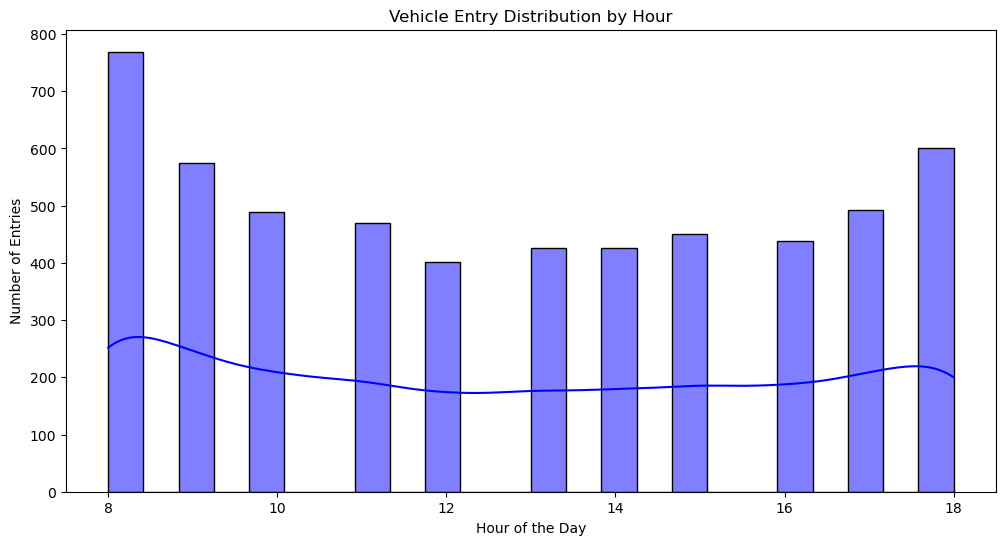

In [35]:
# Distribution of vehicle entries by hour
plt.figure(figsize=(12, 6))
sns.histplot(data['In Hour'], bins=24, kde=True, color='blue')
plt.title('Vehicle Entry Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Entries')
plt.show()

#### Distribution of vehicle exits by hour

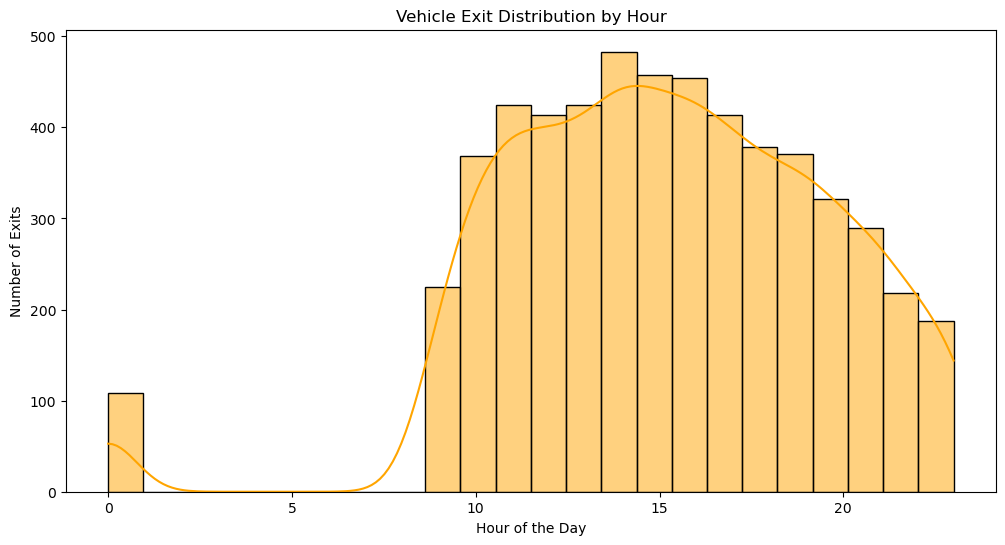

In [37]:
# Distribution of vehicle exits by hour
plt.figure(figsize=(12, 6))
sns.histplot(data['Out Hour'], bins=24, kde=True, color='orange')
plt.title('Vehicle Exit Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Exits')
plt.show()

#### Distribution of parking duration

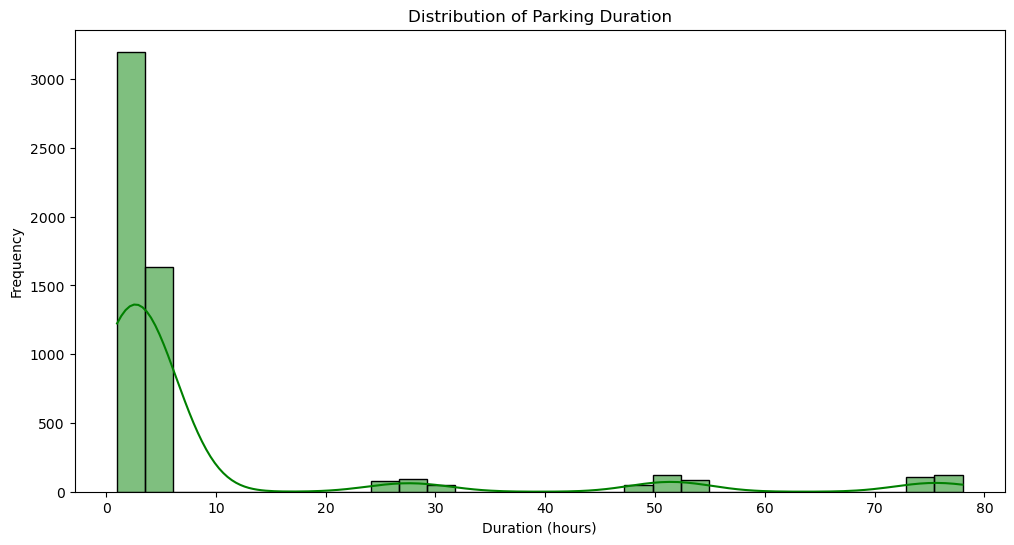

In [39]:
# Distribution of parking duration
plt.figure(figsize=(12, 6))
sns.histplot(data['Duration'], bins=30, kde=True, color='green')
plt.title('Distribution of Parking Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

#### Most frequently occupied parking slots

C:\Users\royso\AppData\Local\Temp\ipykernel_7440\4285471371.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Slot Number', y='Frequency', data=slot_counts, palette='viridis')


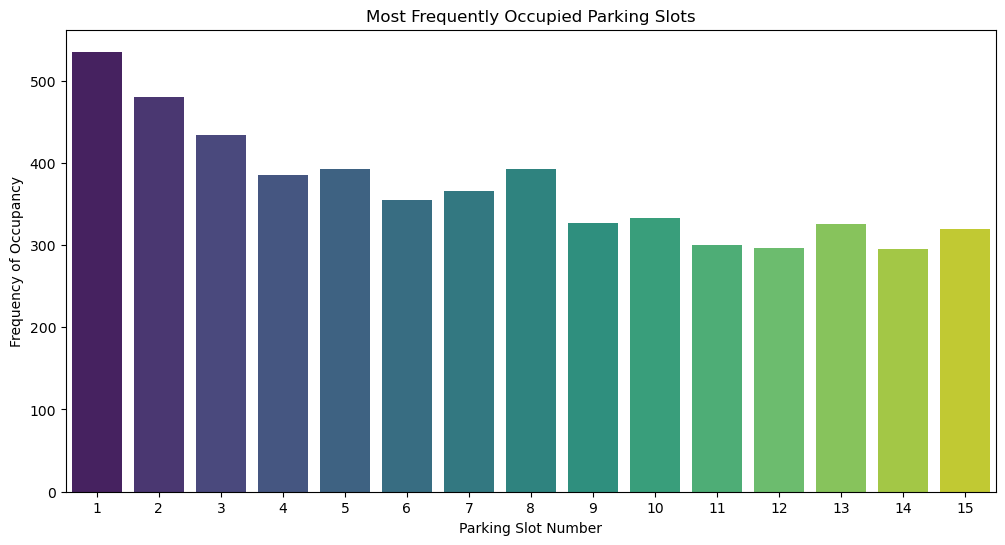

In [43]:
# Most frequently occupied parking slots
slot_counts = data['Slot Number'].value_counts().reset_index()
slot_counts.columns = ['Slot Number', 'Frequency']
plt.figure(figsize=(12, 6))
sns.barplot(x='Slot Number', y='Frequency', data=slot_counts, palette='viridis')
plt.title('Most Frequently Occupied Parking Slots')
plt.xlabel('Parking Slot Number')
plt.ylabel('Frequency of Occupancy')
plt.show()

### Real-time occupancy patterns over time

In [7]:
#### Daywise

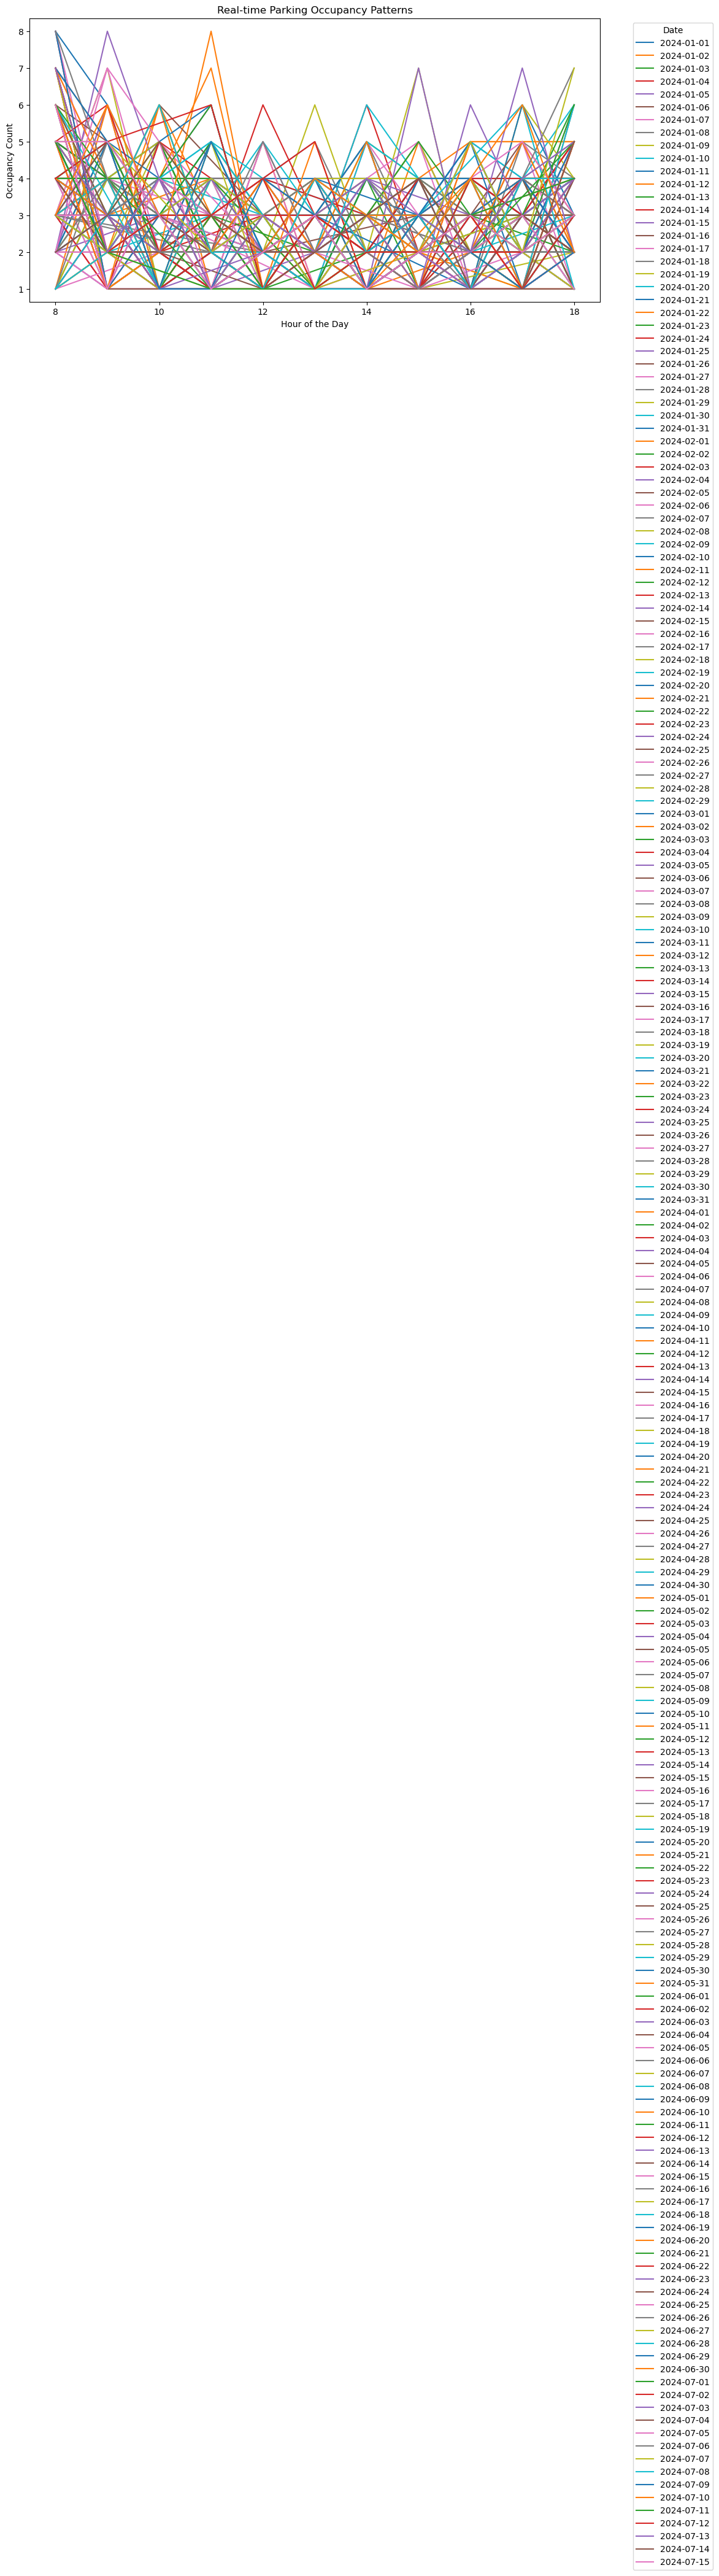

In [45]:
# Group by date and hour to get the occupancy count
occupancy = data.groupby(['In Date', 'In Hour']).size().reset_index(name='Occupancy Count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='In Hour', y='Occupancy Count', hue='In Date', data=occupancy, palette='tab10')
plt.title('Real-time Parking Occupancy Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Occupancy Count')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [55]:
# Extract useful time features
data['In Month'] = data['In Time'].dt.to_period('M').astype(str)  # Extract month as string
data['In Hour'] = data['In Time'].dt.hour

# Display the updated dataset to verify the changes
display(data.head())

# Group by month and hour to get the occupancy count
occupancy_monthwise = data.groupby(['In Month', 'In Hour']).size().reset_index(name='Occupancy Count')

# Display the grouped data to verify the changes
display(occupancy_monthwise.head())

,Vehicle Number,In Time,Out Time,Slot Number,In Date,In Hour,Out Hour,Duration,In Month
0,MH20CS4946,2024-01-01 08:26:00,2024-01-01 11:26:00,1,2024-01-01,8,11,3.0,2024-01
1,HR26DG6167,2024-01-01 18:07:00,2024-01-01 19:07:00,1,2024-01-01,18,19,1.0,2024-01
2,HR26DG6167,2024-01-01 12:10:00,2024-01-01 15:10:00,1,2024-01-01,12,15,3.0,2024-01
3,TN52U1580,2024-01-01 16:36:00,2024-01-01 19:36:00,2,2024-01-01,16,19,3.0,2024-01
4,MH14EU3498,2024-01-01 10:24:00,2024-01-01 16:24:00,2,2024-01-01,10,16,6.0,2024-01


,In Month,In Hour,Occupancy Count
0,2024-01,8,121
1,2024-01,9,105
2,2024-01,10,68
3,2024-01,11,76
4,2024-01,12,60


#### Month-wise

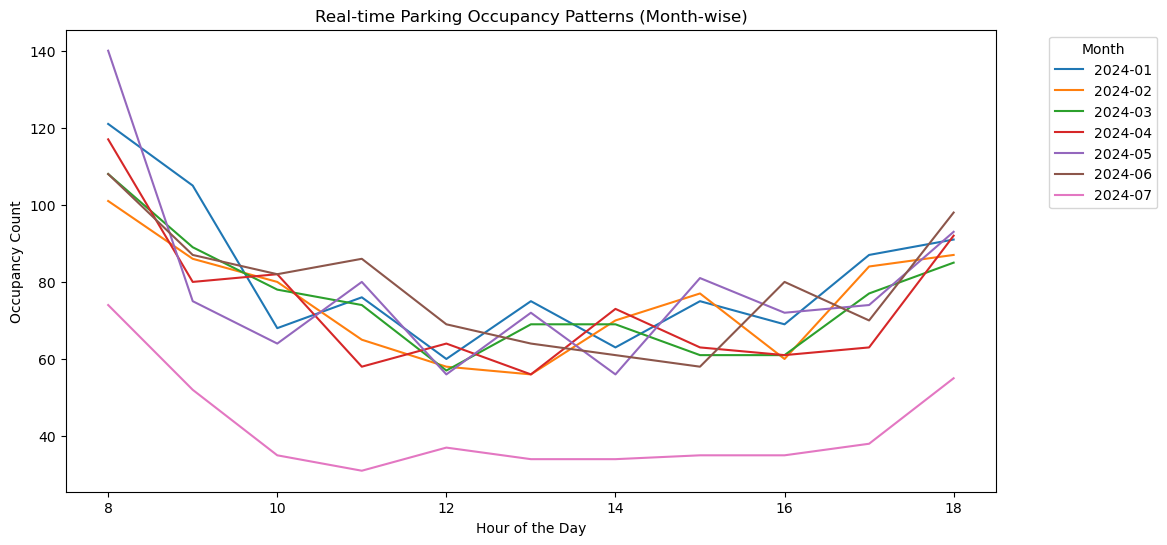

In [57]:
# Plot the real-time parking occupancy patterns month-wise
plt.figure(figsize=(12, 6))
sns.lineplot(x='In Hour', y='Occupancy Count', hue='In Month', data=occupancy_monthwise, palette='tab10')
plt.title('Real-time Parking Occupancy Patterns (Month-wise)')
plt.xlabel('Hour of the Day')
plt.ylabel('Occupancy Count')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Week-wise

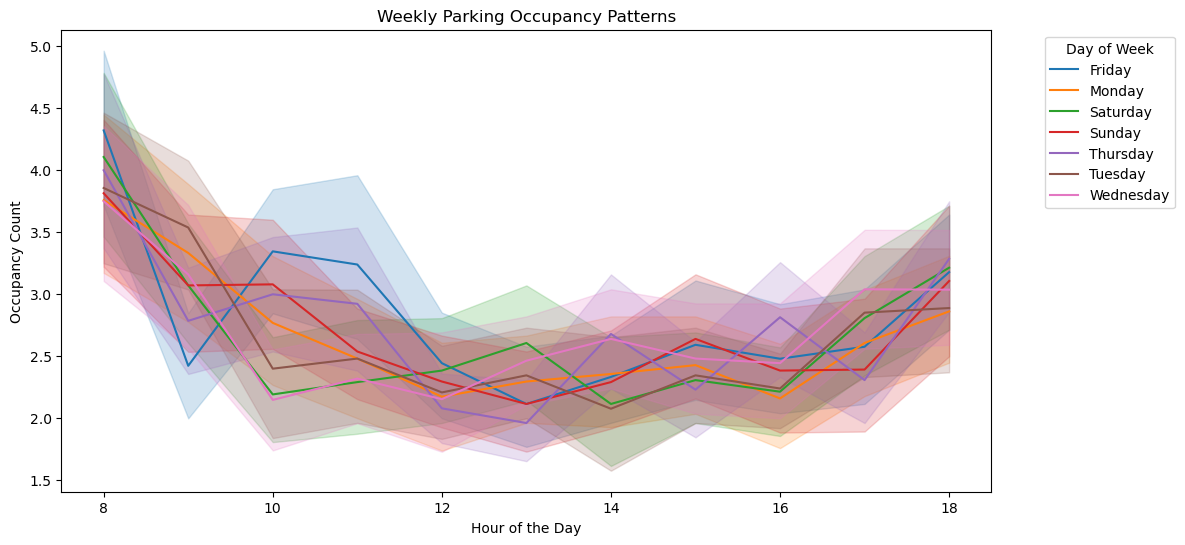

In [64]:
# Extract week and day of the week
data['In Week'] = data['In Time'].dt.isocalendar().week
data['Day of Week'] = data['In Time'].dt.day_name()

# Weekly Occupancy Patterns
weekly_occupancy = data.groupby(['In Week', 'Day of Week', 'In Hour']).size().reset_index(name='Occupancy Count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='In Hour', y='Occupancy Count', hue='Day of Week', data=weekly_occupancy, palette='tab10')
plt.title('Weekly Parking Occupancy Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Occupancy Count')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Top 10 cars by total parking duration

C:\Users\royso\AppData\Local\Temp\ipykernel_7440\72862434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Duration', y='Vehicle Number', data=car_duration, palette='viridis')


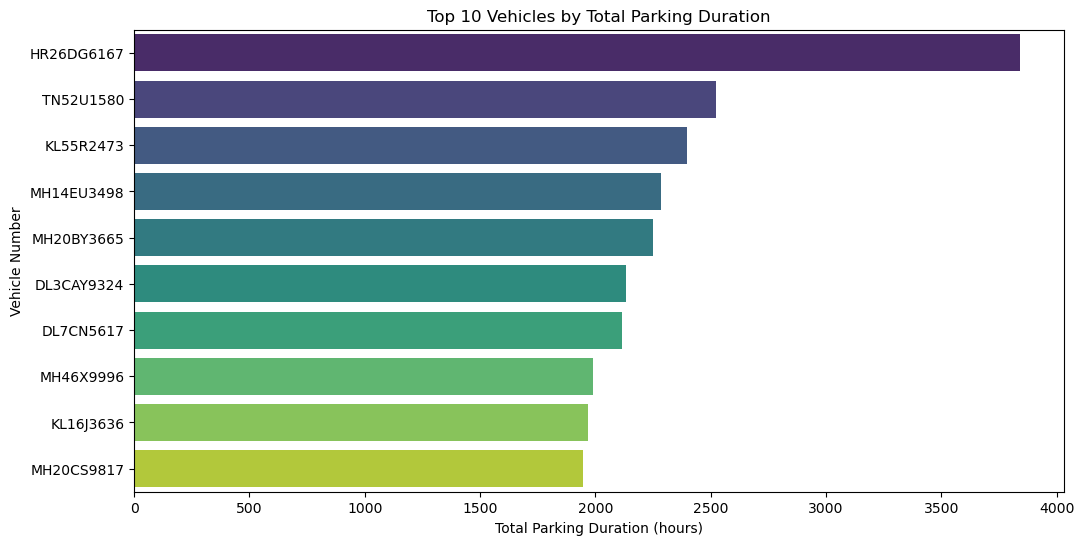

In [68]:
# Car-wise total duration
car_duration = data.groupby('Vehicle Number')['Duration'].sum().reset_index()
car_duration = car_duration.sort_values(by='Duration', ascending=False).head(10)  # Top 10 cars by total duration

plt.figure(figsize=(12, 6))
sns.barplot(x='Duration', y='Vehicle Number', data=car_duration, palette='viridis')
plt.title('Top 10 Vehicles by Total Parking Duration')
plt.xlabel('Total Parking Duration (hours)')
plt.ylabel('Vehicle Number')
plt.show()

#### Top 10 vehicles by entry frequency

C:\Users\royso\AppData\Local\Temp\ipykernel_7440\2725372996.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Vehicle Number', data=car_frequency, palette='viridis')


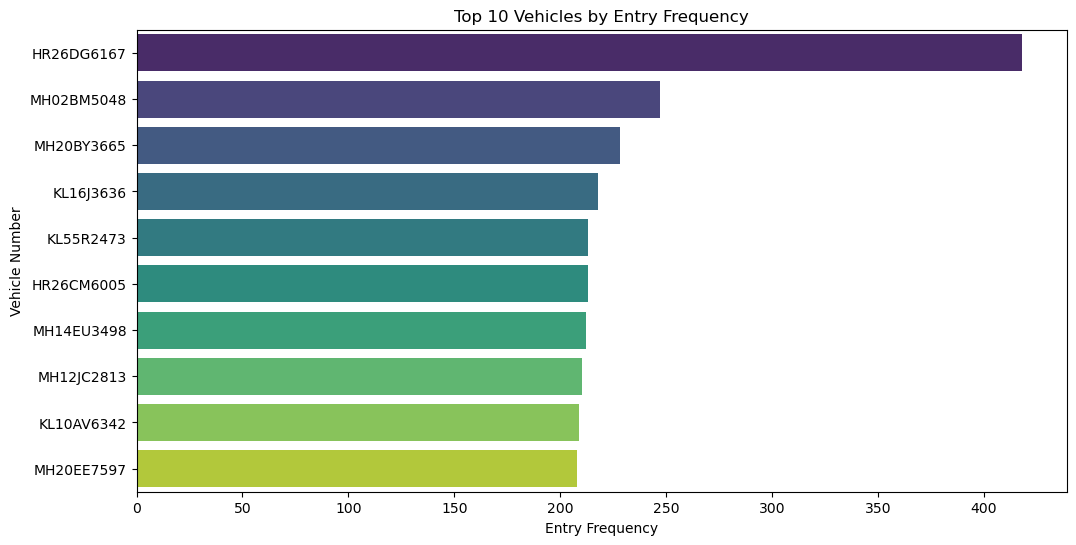

In [70]:
# Car-wise entry frequency
car_frequency = data['Vehicle Number'].value_counts().reset_index()
car_frequency.columns = ['Vehicle Number', 'Frequency']
car_frequency = car_frequency.head(10)  # Top 10 cars by frequency

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Vehicle Number', data=car_frequency, palette='viridis')
plt.title('Top 10 Vehicles by Entry Frequency')
plt.xlabel('Entry Frequency')
plt.ylabel('Vehicle Number')
plt.show()


#### Heatmap of hourly occupancy by day of the week

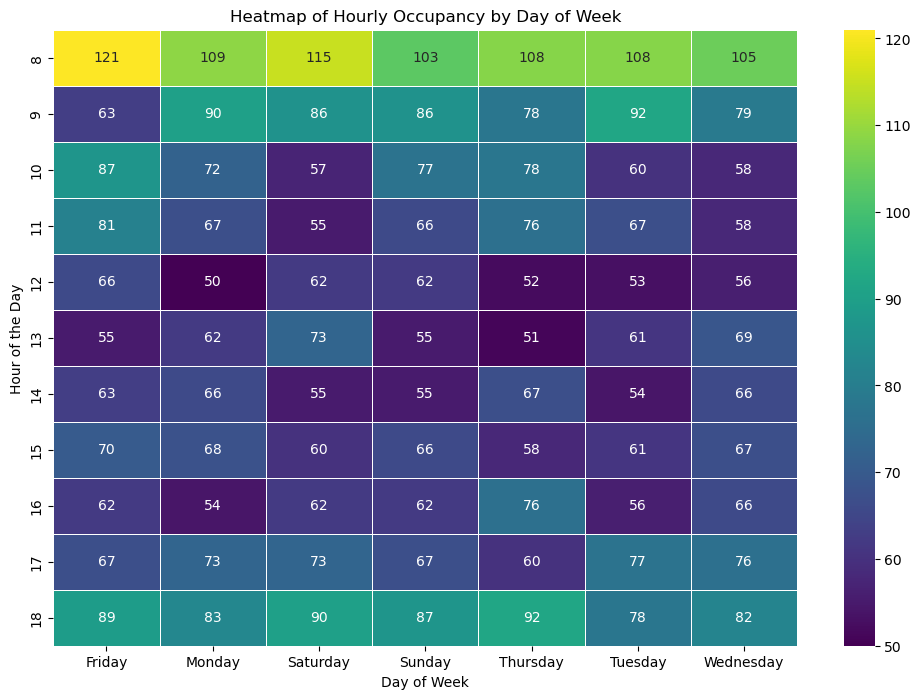

In [72]:
# Heatmap of hourly occupancy
hourly_occupancy = data.groupby(['In Hour', 'Day of Week']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(hourly_occupancy, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Hourly Occupancy by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of the Day')
plt.show()

#### Parking duration distribution by day of the week

C:\Users\royso\AppData\Local\Temp\ipykernel_7440\158601507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day of Week', y='Duration', data=data, palette='viridis')


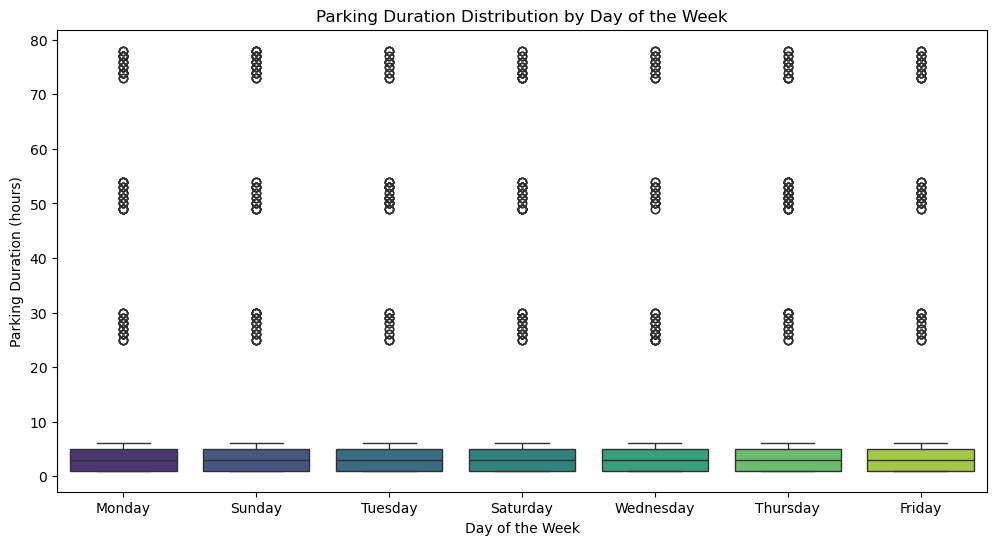

In [74]:
# Parking duration distribution by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day of Week', y='Duration', data=data, palette='viridis')
plt.title('Parking Duration Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Parking Duration (hours)')
plt.show()

#### Parking slot utilisation

C:\Users\royso\AppData\Local\Temp\ipykernel_7440\1573831358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Slot Number', y='Duration', data=slot_utilization, palette='viridis')


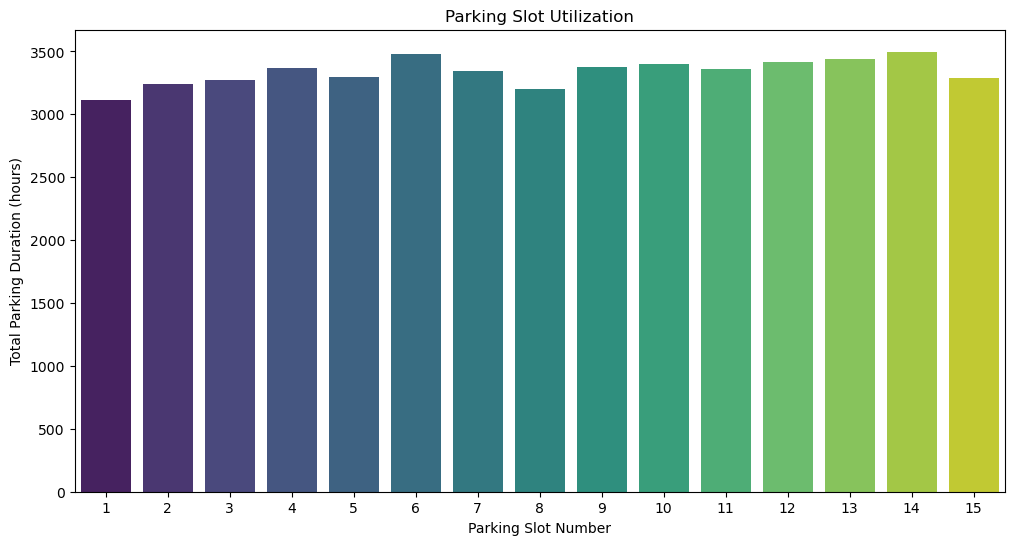

In [76]:
# Parking slot utilisation
slot_utilization = data.groupby('Slot Number')['Duration'].sum().reset_index()
slot_utilization = slot_utilization.sort_values(by='Duration', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Slot Number', y='Duration', data=slot_utilization, palette='viridis')
plt.title('Parking Slot Utilization')
plt.xlabel('Parking Slot Number')
plt.ylabel('Total Parking Duration (hours)')
plt.show()

#### Bar Plot of Mean Parking Duration by Day of the Week

C:\Users\royso\AppData\Local\Temp\ipykernel_7440\3141544358.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of Week', y='Duration', data=mean_duration, palette='viridis')


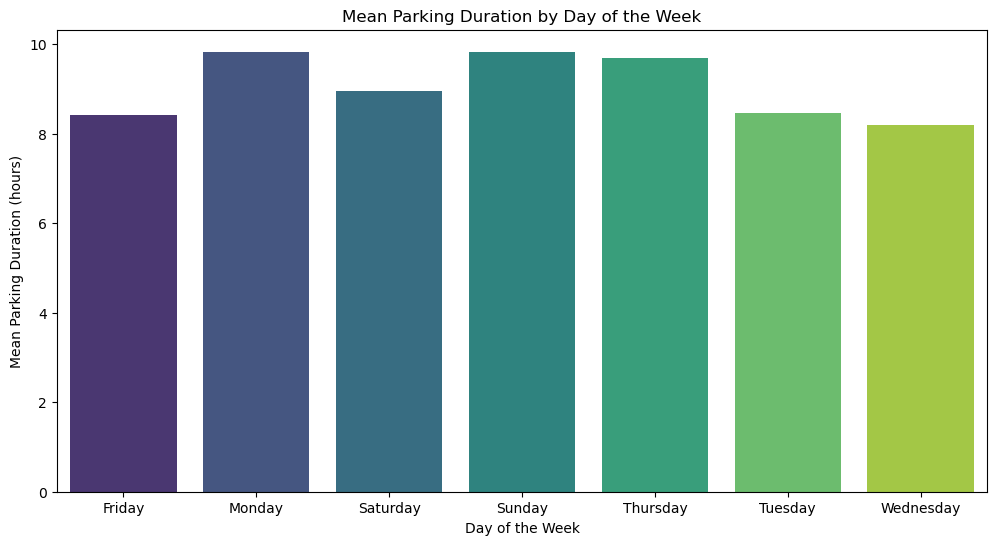

In [80]:
# Bar Plot of Mean Parking Duration by Day of the Week
mean_duration = data.groupby('Day of Week')['Duration'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='Duration', data=mean_duration, palette='viridis')
plt.title('Mean Parking Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Parking Duration (hours)')
plt.show()


#### Violin Plot of Parking Duration by Day of the Week

C:\Users\royso\AppData\Local\Temp\ipykernel_7440\2904402545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Day of Week', y='Duration', data=data, palette='viridis')


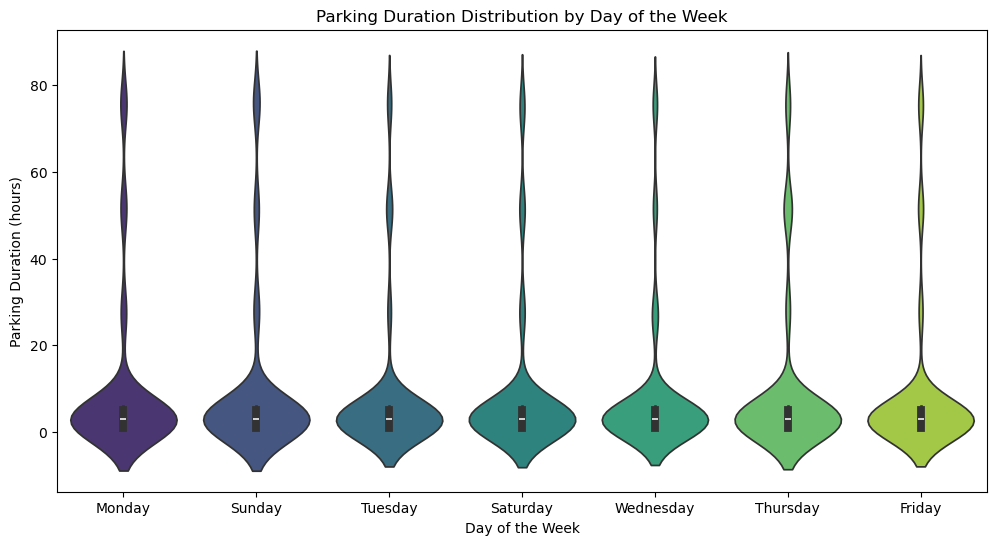

In [82]:
# Violin Plot of Parking Duration by Day of the Week
plt.figure(figsize=(12, 6))
sns.violinplot(x='Day of Week', y='Duration', data=data, palette='viridis')
plt.title('Parking Duration Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Parking Duration (hours)')
plt.show()

#### Strip Plot of Parking Duration by Day of the Week

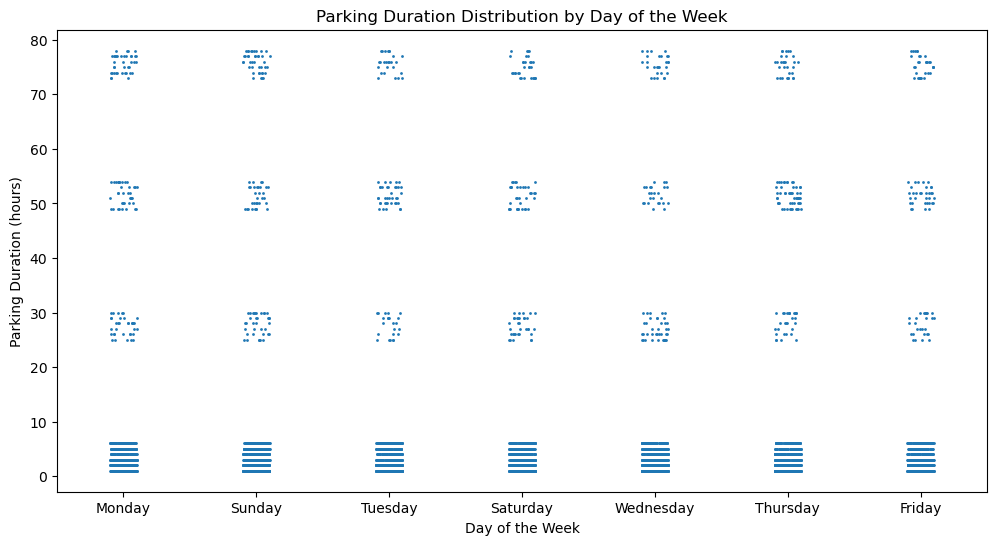

In [87]:
# Strip Plot of Parking Duration by Day of the Week
plt.figure(figsize=(12, 6))
sns.stripplot(x='Day of Week', y='Duration', data=data, jitter=True, size=2)
plt.title('Parking Duration Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Parking Duration (hours)')
plt.show()